# Aerofit - Treadmill Buyer Profile

## Table of Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Data Exploration](#Data-Exploration)
* [Univariate Analysis - Numerical Variables](#Univariate-Analysis---Numerical-Variables)
  * [Distance Plot](#Distance-Plot)
  * [Count Plot](#Count-Plot)
  * [Box Plot](#Box-Plot)
* [Univariate Analysis - Categorical Variables](#Univariate-Analysis---Categorical-Variables)
  * [Count Plot (Categorical)](#Count-Plot-(Categorical))
* [Bivariate Analysis](#Bivariate-Analysis)

## Assignment

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

* The KP281 is an entry-level treadmill that sells for `$1,500` ;
* The KP281 is an entry-level treadmill that sells for `$1,500` ;
* The KP481 is for mid-level runners and sells for `$1,750` ;
* The KP781 treadmill is having advanced features and it sells for `$2,500` .

## Data Description

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

* `Product` - product purchased: KP281, KP481, or KP781


* `Age` - in years


* `Gender` - male/female


* `Education` - in years


* `MaritalStatus` - single or partnered


* `Usage` - the average number of times the customer plans to use the treadmill each week


* `Fitness` - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape


* `Income` - annual income in US dollar


* `Miles` - the average number of miles the customer expects to walk/run each week

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
aerofit_treadmill_data = pd.read_csv('aerofit_treadmill_data.csv')
aerofit_treadmill_data.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [3]:
aerofit_treadmill_data.shape

(180, 9)

In [4]:
aerofit_treadmill_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
aerofit_treadmill_data['Product'] = aerofit_treadmill_data['Product'].astype('category')

aerofit_treadmill_data['Gender'] = aerofit_treadmill_data['Gender'].astype('category')

aerofit_treadmill_data['MaritalStatus'] = aerofit_treadmill_data['MaritalStatus'].astype('category')

In [6]:
aerofit_treadmill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


Skewness is a statistical measure that describes the asymmetry of a data distribution. It quantifies the extent and direction of skew (departure from horizontal symmetry) from a normal distribution.

* If the skewness is less than 0, the data is said to be left-skewed, meaning that the left tail is longer or fatter than the right tail.


* If the skewness is greater than 0, the data is right-skewed, meaning that the right tail is longer or fatter than the left tail.


* If the skewness is close to 0, the data distribution is quite symmetrical, but still, it doesn't indicate it follows a normal distribution.

In [7]:
aerofit_treadmill_data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [8]:
aerofit_treadmill_data.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
aerofit_treadmill_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
aerofit_treadmill_data.duplicated(subset = None,keep='first').sum()

0

#### Observations:

* There are no missing values in the data.


* There are no dublicated values in the data.


* There are 3 unique products in the dataset.


* KP281 is the most frequent product.


* Minimum & Maximum age of the person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.


* Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.


* Out of 180 data points, 104's gender is Male and rest are the Female.


* Standard deviation for Income & Miles is very high. These variables might have outliers in them.

In [11]:
aerofit_treadmill_data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [12]:
aerofit_treadmill_data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [13]:
aerofit_treadmill_data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [14]:
aerofit_treadmill_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [15]:
aerofit_treadmill_data['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [16]:
aerofit_treadmill_data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [17]:
aerofit_treadmill_data['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [18]:
aerofit_treadmill_data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [19]:
aerofit_treadmill_data['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [20]:
aerofit_treadmill_data['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [21]:
aerofit_treadmill_data['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [22]:
aerofit_treadmill_data['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [23]:
aerofit_treadmill_data['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

## Univariate Analysis - Numerical Variables

### Distance Plot

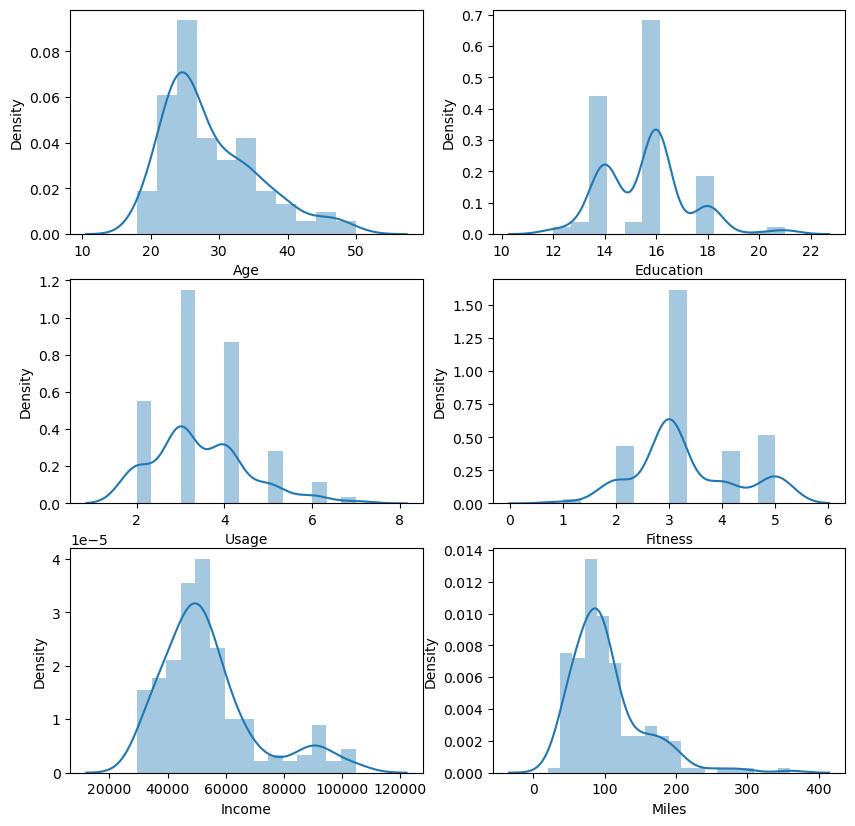

In [24]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (10,7))
fig.subplots_adjust(top = 1.2)

sns.distplot(aerofit_treadmill_data['Age'], kde = True, ax = axis[0,0])
sns.distplot(aerofit_treadmill_data['Education'], kde = True, ax = axis[0,1])
sns.distplot(aerofit_treadmill_data['Usage'], kde = True, ax = axis[1,0])
sns.distplot(aerofit_treadmill_data['Fitness'], kde = True, ax = axis[1,1])
sns.distplot(aerofit_treadmill_data['Income'], kde = True, ax = axis[2,0])
sns.distplot(aerofit_treadmill_data['Miles'], kde = True, ax = axis[2,1])
plt.show()

#### Observations:

* Both **Miles** and **Income** have significant outliers based on the above distribution.

* Also **Miles** and **Income** are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

* Customer with fitness level 3 buy a major chuck of treadmills.

* Majority of Customers fall within the `$ 45,000 - $ 60,000` income range.

### Count Plot
The count plot displays the number of occurrences (counts) of each category in the given dataset. In other words, it shows the frequency distribution of a categorical variable. It is generally used for categorical data but given the small number of unique numbers such as in our case, it can also be used to visualize numeric data.

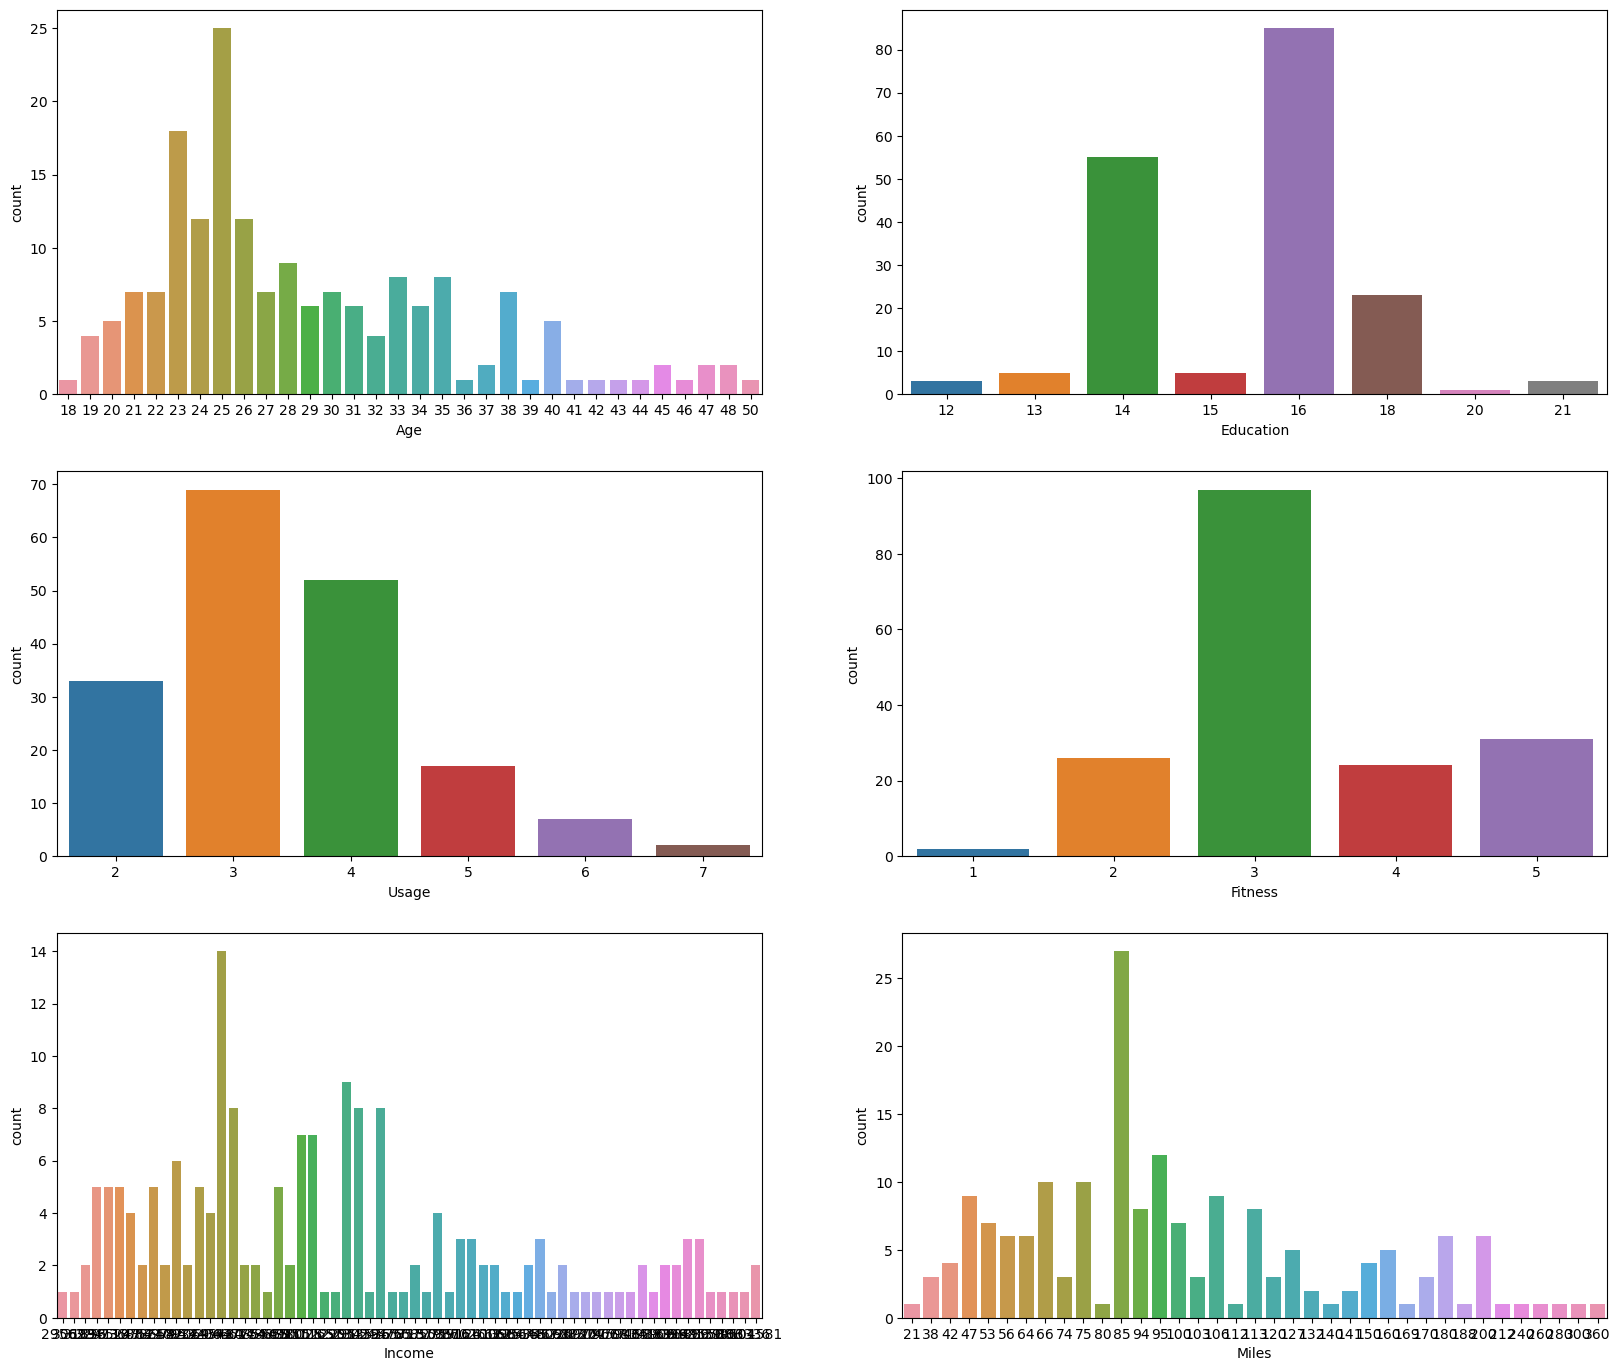

In [26]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 12))
fig.subplots_adjust(top = 1.2)

sns.countplot(data = aerofit_treadmill_data, x = "Age", ax = axis[0,0])
sns.countplot(data = aerofit_treadmill_data, x = "Education", ax = axis[0,1])
sns.countplot(data = aerofit_treadmill_data, x = "Usage", ax = axis[1,0])
sns.countplot(data = aerofit_treadmill_data, x = "Fitness", ax = axis[1,1])
sns.countplot(data = aerofit_treadmill_data, x = "Income", ax = axis[2,0])
sns.countplot(data = aerofit_treadmill_data, x = "Miles", ax = axis[2,1])
plt.show()

#### Observations:

* Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.

### Box Plot

A box plot (also known as a box-and-whisker plot) is a statistical graphic that displays a summary of a set of data values. It's a standardized way of displaying the dataset based on a five-number summary: the minimum, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum.

* The box in the middle represents the interquartile range (IQR), the range between the first quartile (25th percentile) and the third quartile (75th percentile).
* The line inside the box represents the median (50th percentile) of the data.
* The whiskers represent the variability outside the upper and lower quartiles, hence they also represent the spread of the rest of the data.
* The points outside the whiskers are considered outliers and represent individual data points that are a significant distance from the rest of the data.

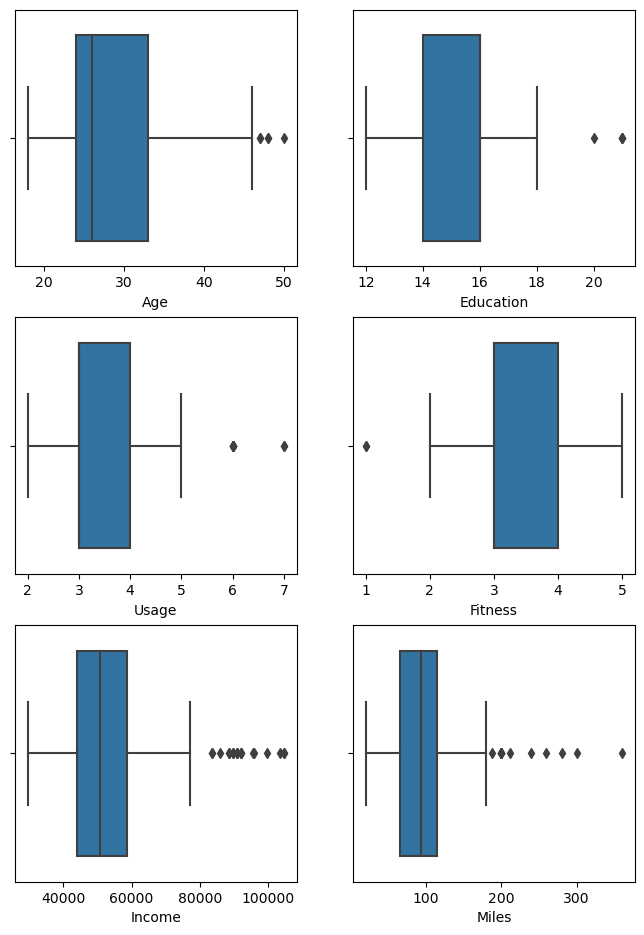

In [30]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 8))
fig.subplots_adjust(top = 1.2)

sns.boxplot(data = aerofit_treadmill_data, x = "Age", orient='h', ax = axis[0,0])
sns.boxplot(data = aerofit_treadmill_data, x = "Education", orient='h', ax = axis[0,1])
sns.boxplot(data = aerofit_treadmill_data, x = "Usage", orient='h', ax = axis[1,0])
sns.boxplot(data = aerofit_treadmill_data, x = "Fitness", orient='h', ax = axis[1,1])
sns.boxplot(data = aerofit_treadmill_data, x = "Income", orient='h', ax = axis[2,0])
sns.boxplot(data = aerofit_treadmill_data, x = "Miles", orient='h', ax = axis[2,1])
plt.show()

#### Observations:

* `Age`, `Education`, and `Usage` have very few outliers.







* While `Income` and `Miles` have more outliers.

## Univariate Analysis - Categorical Variables

### Count Plot (Categorical)

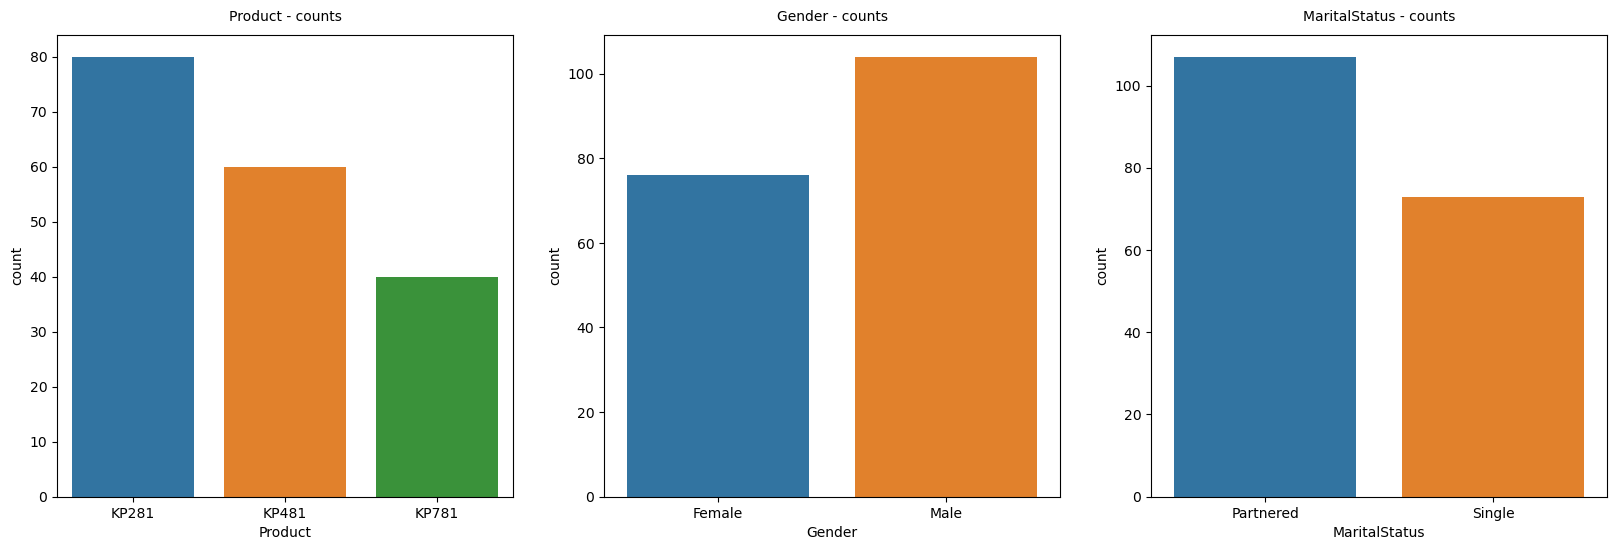

In [37]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))
sns.countplot(data = aerofit_treadmill_data, x = 'Product', ax = axs[0])
sns.countplot(data = aerofit_treadmill_data, x = 'Gender', ax = axs[1])
sns.countplot(data = aerofit_treadmill_data, x = 'MaritalStatus', ax = axs[2])

axs[0].set_title('Product - counts', pad = 10, fontsize = 10)
axs[1].set_title('Gender - counts', pad = 10, fontsize = 10)
axs[2].set_title('MaritalStatus - counts', pad = 10, fontsize = 10)

plt.show()

#### Observations
* KP281 is the most frequent product and best-selling product.
* In `Gender`, there are more Males who are using treadmills than Females.
* The treadmills are more likely to be purchased by partnered people.

## Bivariate Analysis

Checking if features have any effect on the product purchased.

* **Product vs Gender:** This plot shows the count of each Product category broken down by Gender. The height of each bar indicates the total count of the respective product, and each bar is colored to show the count for each gender. This can give you insights about the gender distribution within customers group of each product.

* **Product vs MaritalStatus:** Similar to the first plot, this plot displays the count of each Product category, but broken down by MaritalStatus instead of Gender. This allows you to understand how the marital status of individuals is distributed within customers group of each product.

* **Age vs Product:** This plot displays the count of each Age value broken down by Product. Since 'Age' is a numeric variable, the x-axis represents different ages or age bins, and the colored bars will indicate the count of each product at those ages. This plot provides insights about the product preference across different ages.

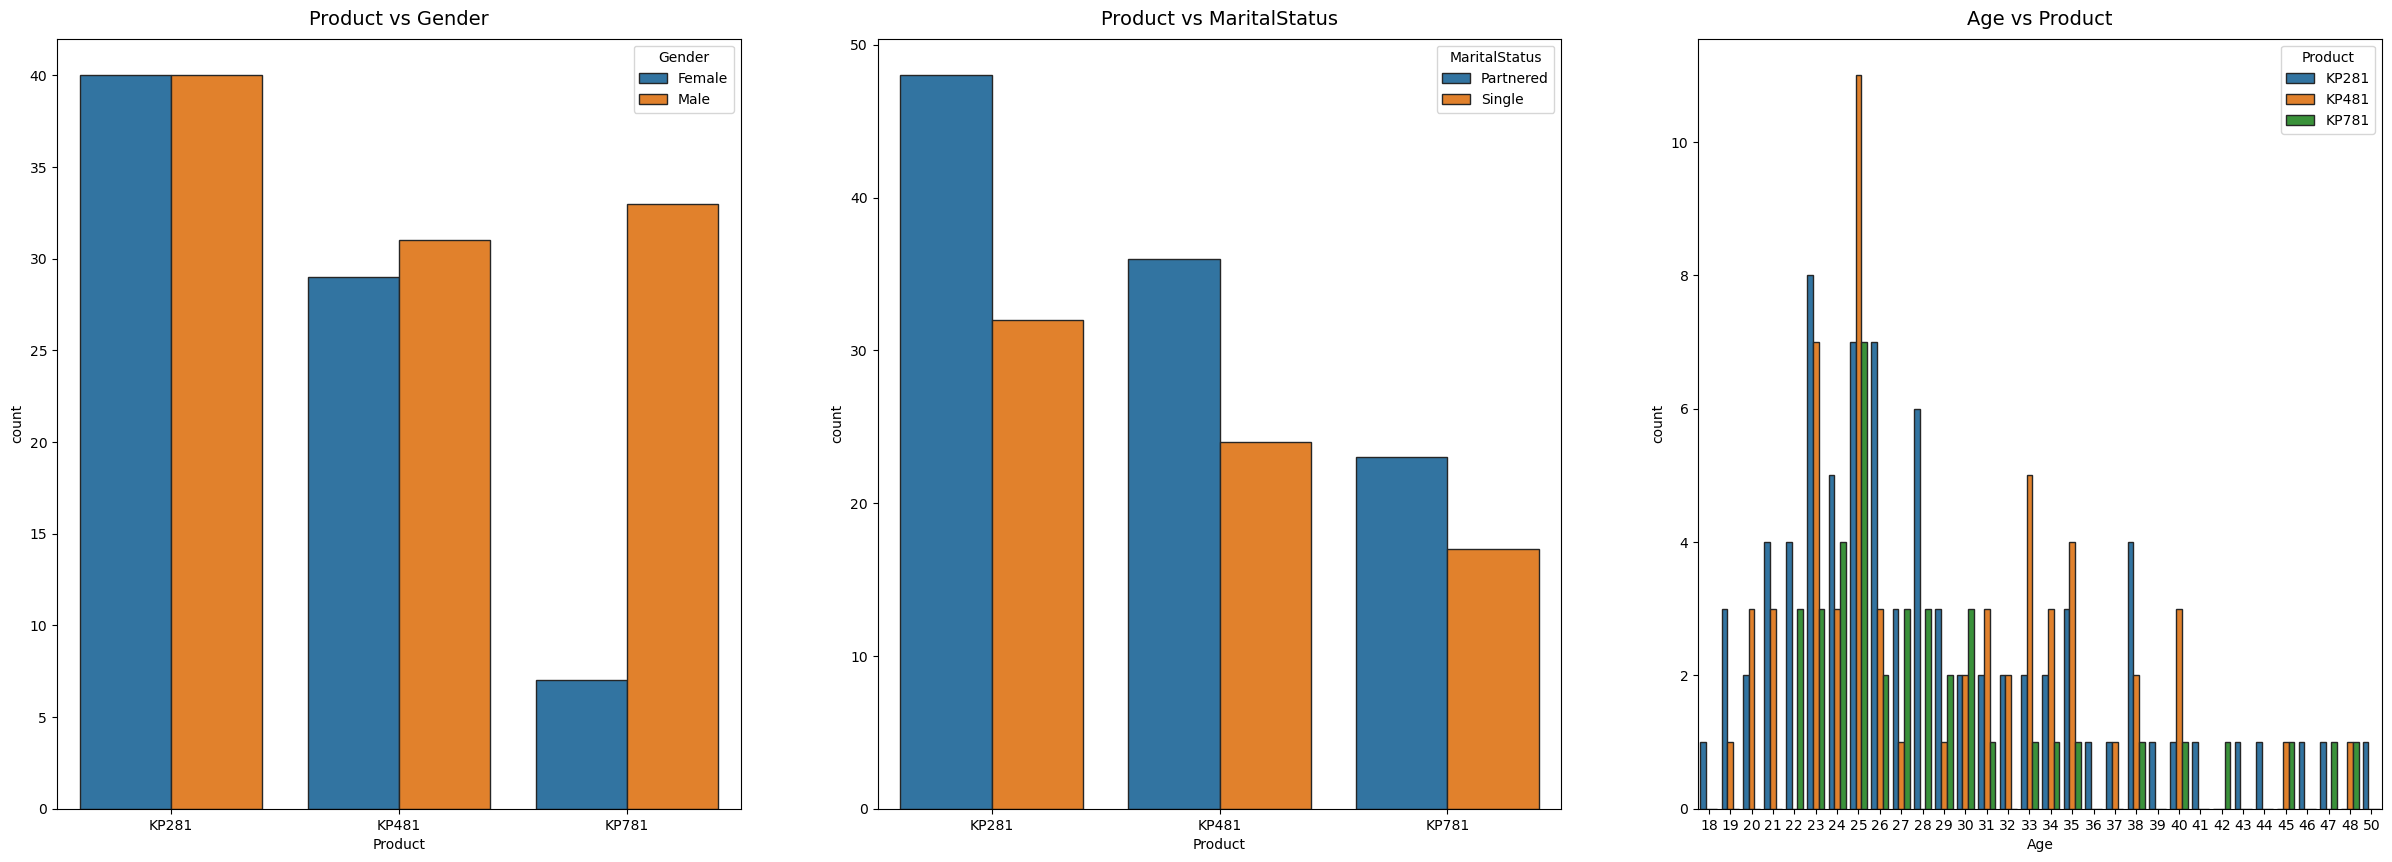

In [40]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
sns.countplot(data = aerofit_treadmill_data, x = 'Product', hue = 'Gender', edgecolor = '0.15', ax = axs[0])
sns.countplot(data = aerofit_treadmill_data, x = 'Product', hue = 'MaritalStatus', edgecolor = '0.15', ax = axs[1])
sns.countplot(data = aerofit_treadmill_data, x = 'Age', hue = 'Product', edgecolor = '0.15', ax = axs[2])

axs[0].set_title('Product vs Gender', pad = 10, fontsize = 14)
axs[1].set_title('Product vs MaritalStatus', pad = 10, fontsize = 14)
axs[2].set_title('Age vs Product', pad = 10, fontsize = 14)

plt.show()

#### Obervations

* **Product vs Gender**
  * Equal number of males and females have purchased KP281 product and Almost same for the product KP481
  * Most of the Male customers have purchased the KP781 product.

* **Product vs MaritalStatus**
  * Customer who is Partnered, is more likely to purchase the product.

* **Age vs Product**
  * Customers with age of 25 are more likely to purchase the KP481 product.
